In [ ]:
%load_ext autoreload
%autoreload 2

In [1037]:
import tg
import tg.obj as obj
import tg.sampler as sampler
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

In [1038]:
dtype = tf.float64

In [1039]:
stone_texture = tf.keras.utils.load_img("data/stone-texture.jpg", color_mode="rgb")
stone_texture = tf.keras.preprocessing.image.img_to_array(stone_texture) / 255
stone_texture = tf.transpose(tf.constant(stone_texture, dtype=dtype), (1, 0, 2))

In [1040]:
with open('data/susan.obj') as f:
    lines = f.readlines()

triangles, normals, uvs = obj.load(lines)

triangles = tf.constant(triangles, dtype=tf.float32)
normals = tf.constant(normals, dtype=tf.float32)
uvs = tf.constant(uvs, dtype=tf.float32)

triangles += (0, 0, 5)


In [1041]:
near_limit = 1
far_limit = 10
focal_length = 2000
width = 2000
height = 1000

In [1042]:
def perspective(triangles):
    scale = focal_length / triangles[...,2]
    x = triangles[...,0] * scale
    y = triangles[...,1] * scale
    z = triangles[...,2]
    return tf.stack([x + width/2, y + height/2, z], axis=-1)

def vertex_shader(triangles, uvs, normals):
    return triangles, uvs

def pixel_shader(coordinates, uvs):
    return sampler.sample_bilinear(stone_texture, uvs)

In [1049]:
with tf.device("/CPU:0"):
    color = tg.render(triangles, (uvs, normals), width, height, near_limit, far_limit, perspective, vertex_shader, pixel_shader, dtype)

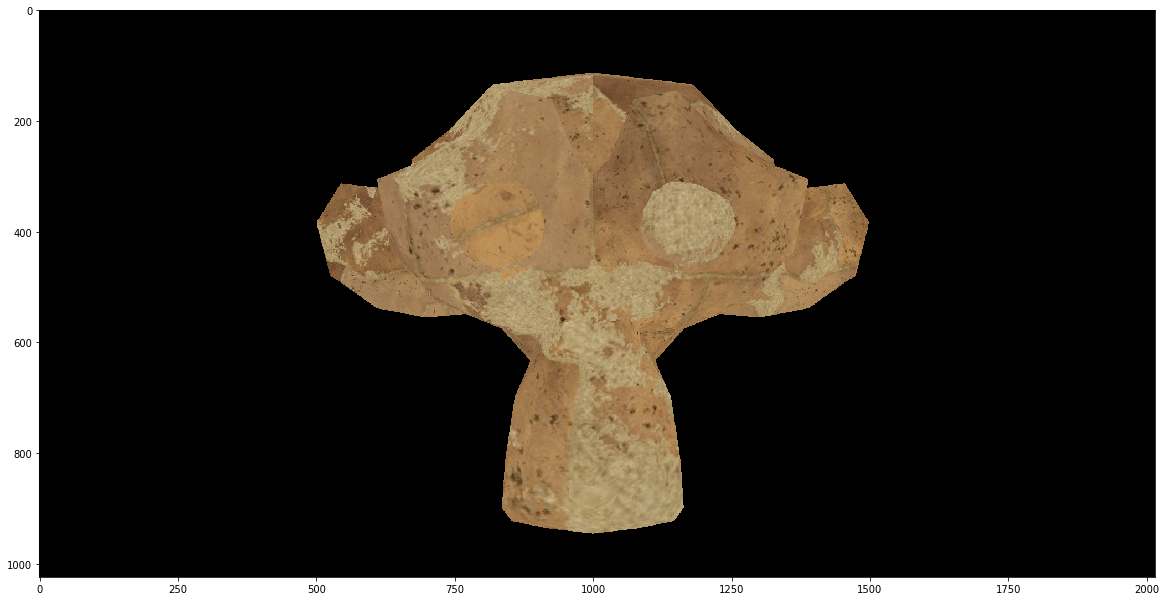

In [1050]:
fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(
    # tf.transpose(depth),
    tf.transpose(tf.cast(color, tf.float32), (1, 0, 2)),
    interpolation='nearest'
)
pass